<a href="https://colab.research.google.com/github/transcend112/CAP_coursex/blob/master/nkumarachchi2019_CAP5768_Fall2020_Assignment3_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 3: Statistics and Probability Distributions
## STARTER 

### Goals 

- To transition from data analytics to basic statistical analysis.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.
- To practice the computation and displaying of representative statistical distributions.
- To compute moments and skewness measures.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.

### Instructions

- This assignment is structured in four parts, each using their own dataset(s).
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import scipy.stats as ss
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: The Iris dataset

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

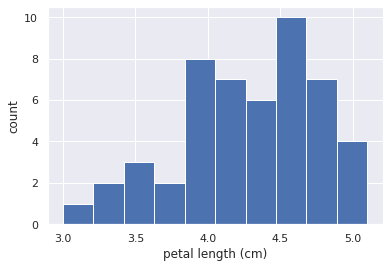

In [ ]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### 1.1 Your turn! (6 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (2 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (2 pts) 

3. Compute summary statistics (1 pt each): mean and standard deviation 

In [ ]:
len(versicolor_petal_length) # 

50

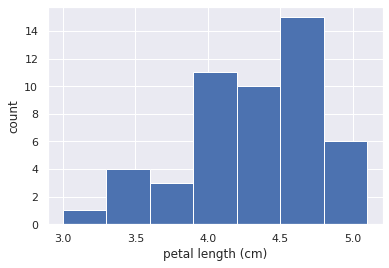

In [ ]:
# Enter your code here
# ...

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

ndata = len(versicolor_petal_length) # How many data
n_bins = int(np.sqrt(ndata))   # number of bins

plt.hist(versicolor_petal_length, bins=n_bins  )

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

* To get probability/proportion data should be normalized.





In [ ]:

print (n_bins)

7


[0.80952381 0.71428571 0.9047619  0.47619048 0.76190476 0.71428571
 0.80952381 0.14285714 0.76190476 0.42857143 0.23809524 0.57142857
 0.47619048 0.80952381 0.28571429 0.66666667 0.71428571 0.52380952
 0.71428571 0.42857143 0.85714286 0.47619048 0.9047619  0.80952381
 0.61904762 0.66666667 0.85714286 0.95238095 0.71428571 0.23809524
 0.38095238 0.33333333 0.42857143 1.         0.71428571 0.71428571
 0.80952381 0.66666667 0.52380952 0.47619048 0.66666667 0.76190476
 0.47619048 0.14285714 0.57142857 0.57142857 0.57142857 0.61904762
 0.         0.52380952]


(array([ 3.,  2.,  3., 11., 10., 15.,  6.]),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.71428571, 0.85714286, 1.        ]),
 <a list of 7 Patch objects>)

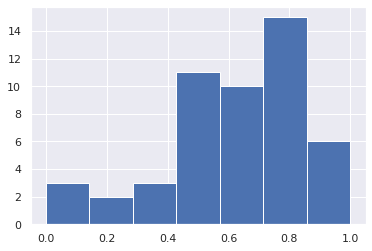

In [ ]:
# Normalizing data # normalize X axis , patel lenght, 
np.array(versicolor_petal_length)
normalized_data = ( np.array(versicolor_petal_length) - np.min(versicolor_petal_length) ) / (np.max(versicolor_petal_length) - np.min(versicolor_petal_length) )
print(normalized_data)

plt.hist(normalized_data, bins=n_bins  )

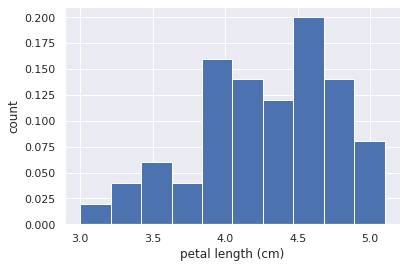

In [ ]:

ndata = len(versicolor_petal_length) #
n_bins = int(np.sqrt(ndata))   # 

#propability = y*weight
#weight = 1/cumulative sum (total data points) ;
Yweight = np.ones(len(versicolor_petal_length)) / len(versicolor_petal_length) # an array of 1/50 (s) = np.ones(len(versicolor_petal_length)) / len(versicolor_petal_length)


plt.hist(versicolor_petal_length, weights=Yweight )  

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

In [ ]:
print("STD =", np.std(versicolor_petal_length) , "   " "Mean =", np.mean(versicolor_petal_length)  ) 

STD = 0.4651881339845204    Mean = 4.26


### 1.2 Your turn! (3 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

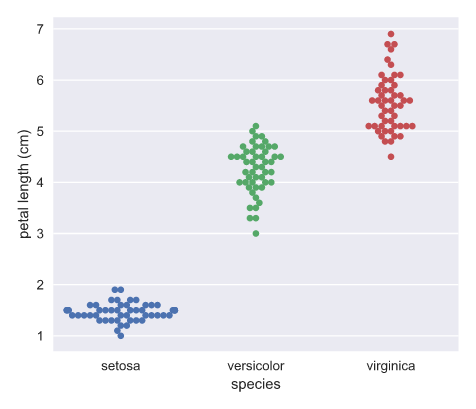


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'petal length (cm)')

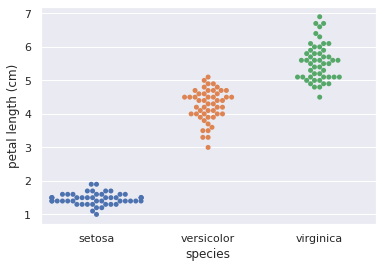

In [ ]:
# Enter your code here
# ...

ax = sns.swarmplot(x="species", y="petal_length", data=iris)
plt.ylabel('petal length (cm)')

### Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### 1.3 Your turn! (6 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (3 pts) and plot the resulting ECDF (3 pts).

Your plot should look like this:

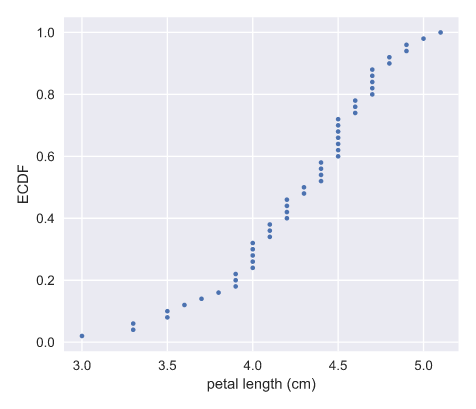

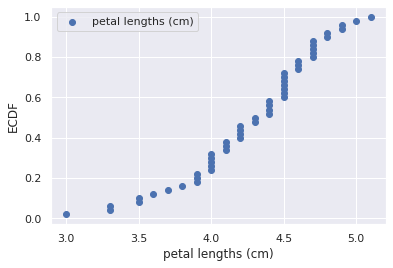

In [ ]:
# Enter your code here
# ...

x,y = ecdf(versicolor_petal_length)

plt.scatter(x, y, label = "petal lengths (cm)" )

# Set x and y axes labels
plt.xlabel('petal lengths (cm)')
plt.ylabel('ECDF')
plt.legend()




### 1.4 Your turn! (4 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

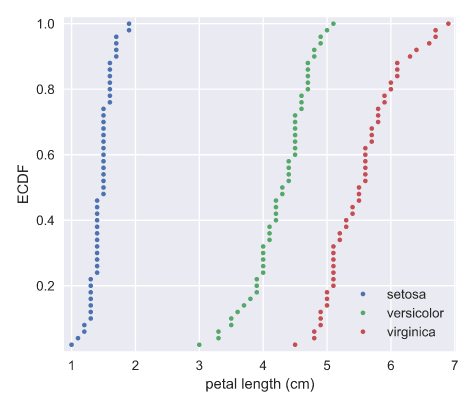

In [ ]:
# Enter your code here
# ...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


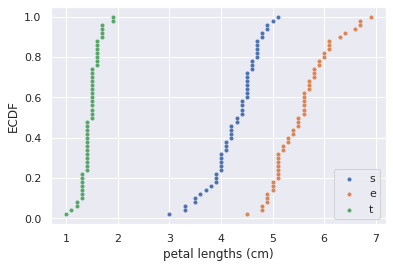

In [ ]:
virginica_petal_length = iris[iris.species == 'virginica'].petal_length
setosa_petal_length = iris[iris.species == 'setosa'].petal_length

import matplotlib.pyplot as plt
 
ax1 = plt.subplot(1, 1, 1)   #create 3 rows of plots in a single column (plt.subplot(3, 1, X)), and will in turn act on the first and second plot (X).
ax2 = plt.subplot(1, 1, 1)
ax3 = plt.subplot(1, 1, 1)

x1,y1 = ecdf(versicolor_petal_length)
x2,y2 = ecdf(virginica_petal_length)
x3,y3 = ecdf(setosa_petal_length)

ax1.scatter(x1,y1, marker='.')
ax2.scatter(x2,y2, marker='.')
ax3.scatter(x3,y3, marker='.')

plt.xlabel('petal lengths (cm)')
plt.ylabel('ECDF')

ax1.legend("versicolor")
ax2.legend("virginica")
ax3.legend("setosa")


### Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

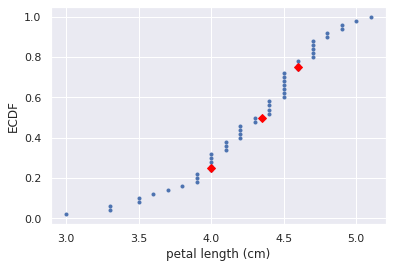

In [ ]:
# Enter your code here
# ...
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Plot the ECDF
_ = plt.plot(x1, y1, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


### 1.5 Your turn! (5 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

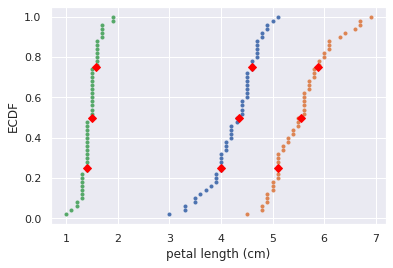

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
ptiles_virginica = np.percentile(virginica_petal_length, percentiles)
ptiles_setosa = np.percentile(setosa_petal_length, percentiles)

# Plot the ECDF
ax1 = plt.plot(x1, y1, '.')
ax2 = plt.plot(x2, y2, '.')
ax3 = plt.plot(x3, y3, '.')

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
ax1 = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')
ax2 = plt.plot(ptiles_virginica, percentiles/100, marker='D', color='red',
         linestyle='none')
ax3 = plt.plot(ptiles_setosa, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

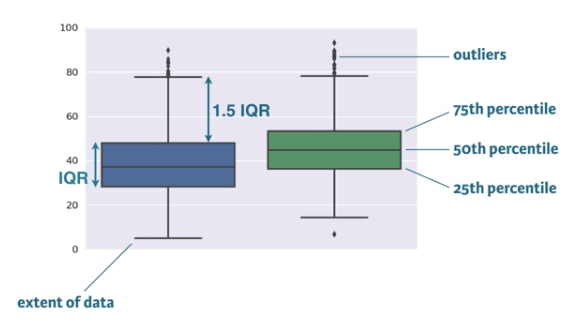


### 1.6 Your turn! (5 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

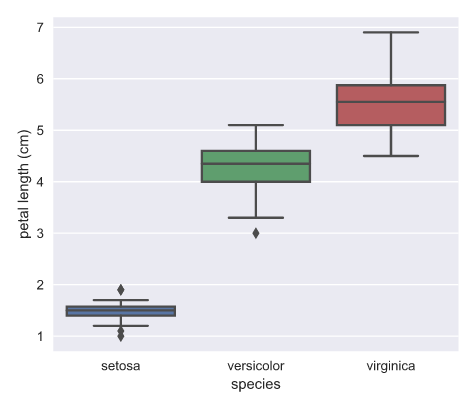

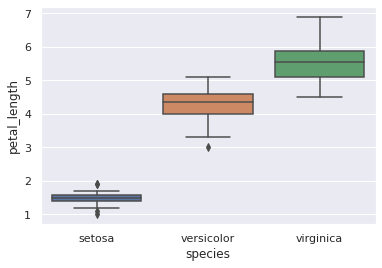

In [ ]:
# Enter your code here
# ...

axb = sns.boxplot(x="species", y="petal_length", data=iris )


### 1.7 Bonus! (5 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


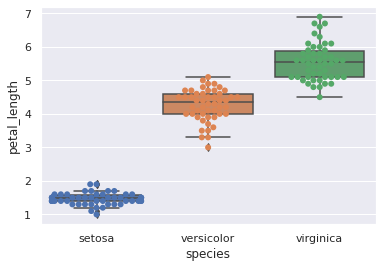

In [ ]:
# Enter your code here
# ...

axbee = sns.swarmplot(x="species", y="petal_length", data=iris, size=6)
plt.ylabel('petal length (cm)')
axb = sns.boxplot(x="species", y="petal_length", data=iris,)


### Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


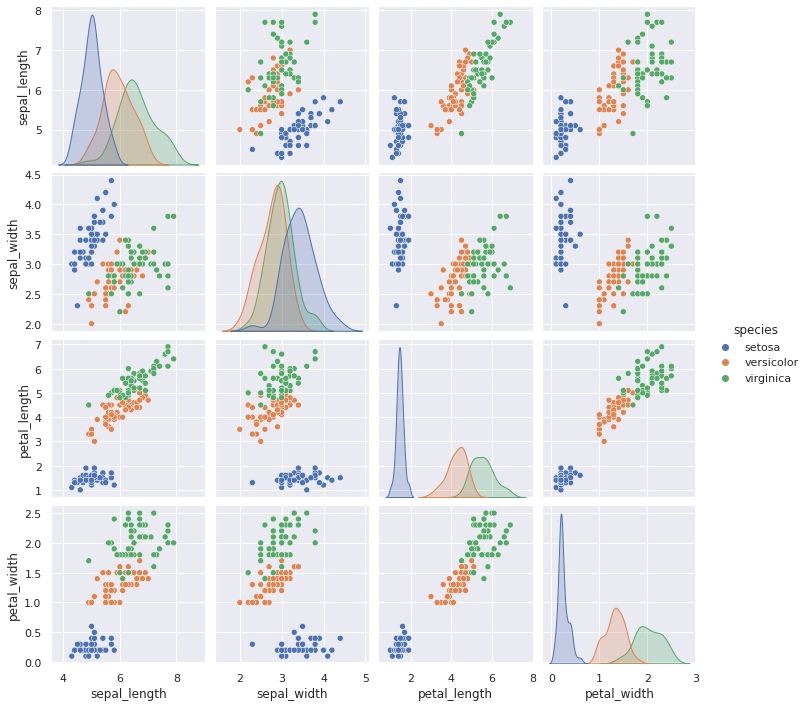

In [ ]:
# Display pair plot
sns.pairplot(data=iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

### 1.8 Bonus! (5 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.  

In [ ]:
# Enter your code here
# ...

virginica_petal_length = iris[iris.species == 'virginica'].petal_length
virginica_petal_width = iris[iris.species == 'virginica'].petal_width

setosa_petal_length = iris[iris.species == 'setosa'].petal_length
setosa_petal_width = iris[iris.species == 'setosa'].petal_width


r_vir = pearson_r(virginica_petal_length , virginica_petal_width )
print('Pearson correlation coefficient between petal length and petal width for virginica species: {:.5f}'.format(r_vir))

# Display pair plot
sns.pairplot(data=iris, hue='species', height=2.5);


r_seto = pearson_r(setosa_petal_length , setosa_petal_width )
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r_seto))


Pearson correlation coefficient between petal length and petal width for virginica species: 0.32211
Pearson correlation coefficient between petal length and petal width for versicolor species: 0.33163


In [ ]:
#wrong
with pd.option_context( 'display.max_rows', 10, 'display.max_columns', 5):
    display(iris.pivot_table('petal_length', index='species', aggfunc=['mean']  ))

,mean
,petal_length
species,
setosa,1.462
versicolor,4.260
virginica,5.552


-------------------
## Part 2: Empirical distributions vs. analytic distributions

### Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

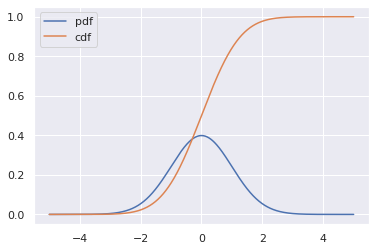

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1


y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

### 2.1 Your turn! (6 points, i.e., 3 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:

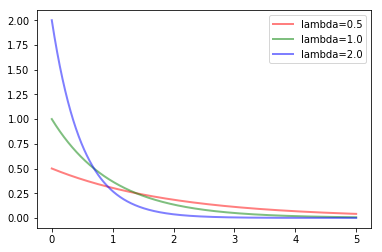

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.

They will probably look like this:

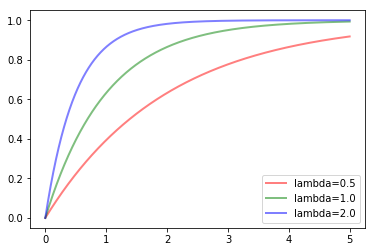

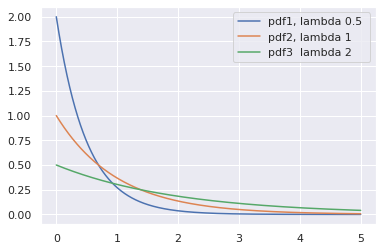

In [89]:
# Enter your code here
# ...

# expon is F(x)  = exp(-x)
# python code : expon.pdf(x, scale)
# ref : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
# y = (x / scale ) 
# scale = 1 / lambda 
# pdf = lambda * exp(-lambda * x)

# pdf Vs cdf ; pdf is propability density function, cdf is  cumulative density function ; 
#eg : to find probabilty between 0.6-0.7 : in pdf we have to intergate .6-.7 ; but in cdf extrapolate to x axis by 0.6 and 0.7 and take the diffecene


x = np.linspace(0, 5, 5000)
mu = 0
sigma = 1

k1=0.5
k2=1
k3 = 2

y_pdf1 = ss.expon.pdf(x, scale=k1  ) # the normal pdf
y_pdf2 = ss.expon.pdf(x, scale=k2  )
y_pdf3 = ss.expon.pdf(x, scale=k3  )

ep1 = plt.plot(x, y_pdf1, label='pdf1, lambda 0.5 ')
ep2 = plt.plot(x, y_pdf2, label='pdf2, lambda 1')
ep3 = plt.plot(x, y_pdf3, label='pdf3,  lambda 2')

plt.legend();


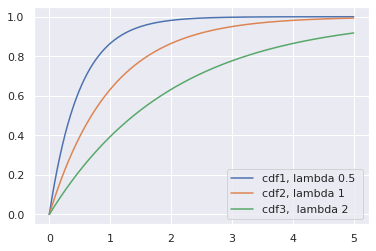

In [90]:
x = np.linspace(0, 5, 5000)
mu = 0
sigma = 1

k1=0.5
k2=1
k3 = 2

y_cdf1 = ss.expon.cdf(x, scale=k1  ) # the normal pdf
y_cdf2 = ss.expon.cdf(x, scale=k2  )
y_cdf3 = ss.expon.cdf(x, scale=k3  )

ec1 = plt.plot(x, y_cdf1, label='cdf1, lambda 0.5')
ec2 = plt.plot(x, y_cdf2, label='cdf2, lambda 1')
ec3 = plt.plot(x, y_cdf3, label='cdf3,  lambda 2')

plt.legend();

### How well can we model empirical distributions with analytic distributions?

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

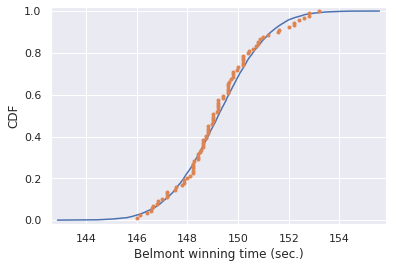

In [92]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [99]:
print(len(np.array(samples)))

10000


My_notes
* CDF Vs ECDF ;
* CDF is perfect curve, (actual) , (hypothetical curve)
* ECDF is plotted for samples / observasion / not a perfect curve





In [94]:
# CDF Vs ECDF ;
# CDF is perfect curve, (actual) , (hypothetical curve)
# ECDF is plotted for samples / observasion not a perfect curve


None


### 2.2 Bonus! (10 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.


In [120]:
# Enter your code here
# ...

samples = np.random.normal(mu, sigma, 1000000)

# Compute mean and standard deviation: mu, sigma
mu2 = np.mean(belmont_no_outliers)
sigma2 = np.std(belmont_no_outliers)

p=0
for i in range(len(samples)):
  if samples[i] <= 144:
    p=p+1
    continue

print(p)

print("Fraction of samples=", p/len(samples))


632
Fraction of samples= 0.000632


### 2.3 Your turn (15 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 

_Hint_: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

In [133]:
# Enter your code
# ...

speed_all_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/michelson_speed_of_light.csv")
speed_all_data.head()



,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [134]:
velocity_set = np.array(speed_all_data['velocity of light in air (km/s)'])
velocity_set

array([299850, 299740, 299900, 300070, 299930, 299850, 299950, 299980,
       299980, 299880, 300000, 299980, 299930, 299650, 299760, 299810,
       300000, 300000, 299960, 299960, 299960, 299940, 299960, 299940,
       299880, 299800, 299850, 299880, 299900, 299840, 299830, 299790,
       299810, 299880, 299880, 299830, 299800, 299790, 299760, 299800,
       299880, 299880, 299880, 299860, 299720, 299720, 299620, 299860,
       299970, 299950, 299880, 299910, 299850, 299870, 299840, 299840,
       299850, 299840, 299840, 299840, 299890, 299810, 299810, 299820,
       299800, 299770, 299760, 299740, 299750, 299760, 299910, 299920,
       299890, 299860, 299880, 299720, 299840, 299850, 299850, 299780,
       299890, 299840, 299780, 299810, 299760, 299810, 299790, 299810,
       299820, 299850, 299870, 299870, 299810, 299740, 299810, 299940,
       299950, 299800, 299810, 299870])

In [129]:
#Compute the mean mu and standard deviation sigma from the michelson_speed_of_light array.

mu3 = np.mean(velocity_set)
print("mu=", mu3)
sigma3 = np.std(velocity_set)
print("sigma=", std3)

mu= 299852.4
sigma= 78.61450247886836


In [150]:
#Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal()

velo_sample = np.random.normal(mu3, sigma3, 10000)
velo_sample

array([299829.11296631, 299909.36217522, 299725.38373619, ...,
       299965.65974083, 299894.4002737 , 299771.30879047])

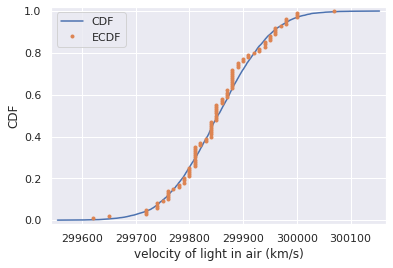

In [182]:
x_theor2, y_theor2 = ecdf(velo_sample)

x6, y6 = ecdf(velocity_set)

# Plot the CDFs and show the plot
an1 = plt.plot(x_theor2, y_theor2,  label='CDF')
an2 = plt.plot(x6, y6, marker='.', linestyle='none',  label='ECDF')
plt.margins(0.02)
plt.xlabel('velocity of light in air (km/s)')
plt.ylabel('CDF')
plt.legend()
plt.show()


------
## Part 3: Events over time

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 



### 3.1: Your turn! (15 points)

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. 

In [176]:
# Enter solution here
# ...
#Read the data and build a Pandas dataframe.

baby_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/babies_brisbane.csv")
baby_data.head(10)


#time : after mid night 0005 , 0104 etc..

#minutes : difference between each births
#first baby has been born at 0005 AM, to adjust it to zero 

#differences between consecutive rows in pandas data frame 
#python code DataFrame.diff()
# λ = 1/mean
# CDF(x) = 1 − e^(−λ x )


birth_min_set = baby_data['minutes']
birth_min_zeroed = birth_min_set.diff()

birth_min_zeroed

lam = 1/np.mean(birth_min_zeroed) #recipocal of the mean

print("reciprocal of the mean of the sample exponential distribution=", lam)


reciprocal of the mean of the sample exponential distribution= 0.03006993006993007


In [175]:
birth_min_zeroed

0       NaN
1      59.0
2      14.0
3      37.0
4      62.0
5      68.0
6       2.0
7      15.0
8       9.0
9     157.0
10     27.0
11     37.0
12      2.0
13     55.0
14     86.0
15     14.0
16      4.0
17     40.0
18     36.0
19     47.0
20      9.0
21     61.0
22      1.0
23     26.0
24     13.0
25     28.0
26     77.0
27     26.0
28     45.0
29     25.0
30     18.0
31     29.0
32     15.0
33     38.0
34      2.0
35      2.0
36     19.0
37     27.0
38     14.0
39     13.0
40     19.0
41     54.0
42     70.0
43     28.0
Name: minutes, dtype: float64

In [181]:
#Take 10,000 samples out of an exponential distribution with this scale using np.random.exponential().

baby_sample = np.random.exponential(np.mean(birth_min_zeroed), 10000)

baby_sample

array([ 16.65120201,   2.9531096 ,  18.27597121, ...,  61.80600163,
       144.94000922,   8.89558426])

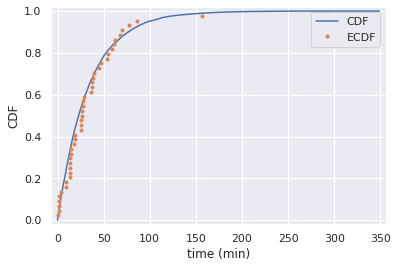

In [185]:
# 4) Compute the CDF of the theoretical samples and the ECDF of the sample data, 
#     assigning the results to x_theor, y_theor and x, y, respectively.

x_theor7, y_theor7 = ecdf(baby_sample)

x8, y8 = ecdf(birth_min_zeroed)

#Plot the CDF of your samples with the ECDF, with labeled axes.

# Plot the CDFs and show the plot

an1 = plt.plot(x_theor7, y_theor7,  label='CDF')
an2 = plt.plot(x8, y8, marker='.', linestyle='none',  label='ECDF')

plt.margins(0.02)
plt.xlabel('time (min)')
plt.ylabel('CDF')
plt.legend()
plt.show()

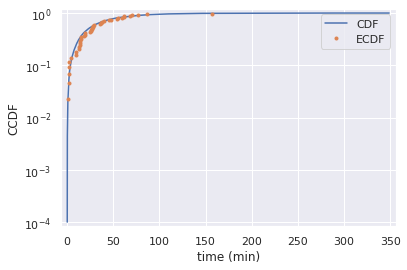

In [196]:
# Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical 
#and sample values, on a log-y scale.

x_theor7, y_theor7 = ecdf(baby_sample)

x8, y8 = ecdf(birth_min_zeroed)

#Plot the CDF of your samples with the ECDF, with labeled axes.

# Plot the CDFs and show the plot

an1 = plt.plot(x_theor7, y_theor7,  label='CDF')
an2 = plt.plot(x8, y8, marker='.', linestyle='none',  label='ECDF')
plt.yscale('log')

plt.margins(0.02)
plt.xlabel('time (min)')
plt.ylabel('CCDF')
plt.legend()
plt.show()

-------------------
## Part 4: Moments and skewness

Let's revisit the dataset of salaries from Assignment 2 and use it to measure skewness.

### 4.1 Your turn! (10 points)

Write Python code to:
1. Read the `salaries.csv` file, compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

In [207]:
# Enter solution here
# ...
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
salaries.head(5)

earn_set = np.array(salaries['earn'])
earn_set

array([50000., 60000., 30000., ...,  8000., 60000.,  6000.])

In [ ]:
#raw moment vs centered moment

raw moment vs centered moment,

*   in raw moment A=0
*   centered moment , A= mu (has a value)


A=0 
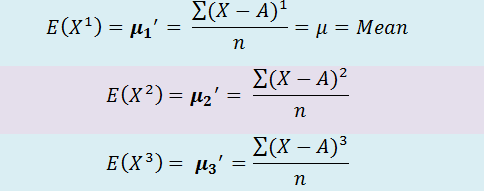

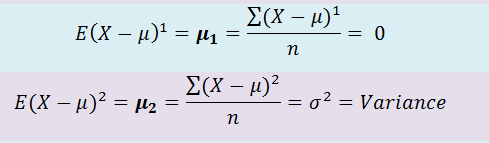

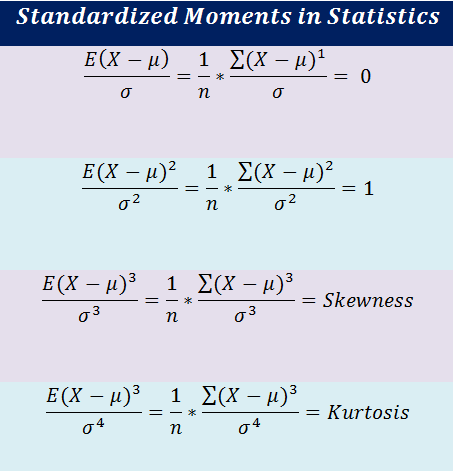

In [227]:
# 1) Compute the first raw moment and show that it is equivalent to computing the mean value

raw_moment = sum(item**1 for item in earn_set )/len(earn_set)
print("first raw_moment(1)=", raw_moment)
print("mean=", np.mean(earn_set) )


first raw_moment(1)= 23154.773489932886
mean= 23154.773489932886


In [232]:
# Compute the second central moment and show that it is equivalent to computing the variance.

#from scipy.stats import moment

ss.moment(earn_set, moment=2)

np.var(earn_set)

print("second central_moment(2)=", moment(earn_set, moment=2))
print("varience=", np.var(earn_set) )


second central_moment(2)= 378852251.6248677
varience= 378852251.6248677


In [235]:
# Compute the skewness using scipy.stats.skew

ss.skew(earn_set)
print("skewness=", ss.skew(earn_set))

skewness= 2.880309741267592


### Questions (9 points, 3 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

3. How do you interpret the value of skewness computed by your code in Part 4?

*Enter your answers here*

1) Explain the "binning bias" associated with histogram plots.

Answer
* Somethieme when binning the data, it will lead to biased conculsions, 
as an example ; two data may not differ a lot but, binning may put them in two different conclusion. 

2) What is a bee swarm plot and in which situations should you (not) use it?

 * a one-dimensional scatter plot, which has non overlapping points , also points are corresponding to the frequency. 
 * it should use to display continuous data that shows close together for contrasting effect, but also relating to a catogorical a metric system. 

3) How do you interpret the value of skewness computed by your code in Part 4?

 * in a positive skew data set, data density is high in left side, Mode < mean < medeian
 * in a negative skew data set, data density is high in right side, medeian < mean < mode




### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

*Enter your conclusions here*

